In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def sign(num):
    if num == 0:
        return 0
    else:
        return num / abs(num)

In [12]:
def linear_classify(x, theta, theta_0):
    """Uses the given theta, theta_0, to linearly classify the given data x. This is our hypothesis or hypothesis class.

    :param x:
    :param theta:
    :param theta_0:
    :return: 1 if the given x is classified as positive, -1 if it is negative, and 0 if it lies on the hyperplane.
    """
    # Todo: Implement the linear classifier here that classifies x given theta, theta_0, and returns the result.
    res = np.dot(theta.T, x)[0] + theta_0
    return sign(res)


In [13]:
def Loss(prediction, actual):
    """Computes the loss between the given prediction and actual values.

    :param prediction:
    :param actual:
    :return: 2 if prediction is wrong, 0 if prediction is correct
    """
    # Todo: Implement the loss between a predicted and actual value here, and return the loss.
    return abs(prediction - actual) # if prediction is correct, returns 0, else returns 2


In [14]:
def E_n(h, data, labels, L, theta, theta_0):
    """Computes the error for the given data using the given hypothesis and loss.

    :param h: Hypothesis class, for example a linear classifier.
    :param data: A d x n matrix where d is the number of data dimensions and n the number of examples.
    :param labels: A 1 x n matrix with the label (actual value) for each data point.
    :param L: A loss function to compute the error between the prediction and label.
    :param theta:
    :param theta_0:
    :return:
    """
    # Todo: Compute the training loss E_n here and return it.
    predictions = [linear_classify(x, theta, theta_0) for x in data.T] # turning the data sideways so that each entry has 1 x n dimensions
    loss_sum = np.sum([L(label, prediction) for label, prediction in zip(labels, predictions)])
    return loss_sum / data.shape[1]


In [15]:
def random_linear_classifier(data, labels, params={}, hook=None):
    """

    :param data: A d x n matrix where d is the number of data dimensions and n the number of examples.
    :param labels: A 1 x n matrix with the label (actual value) for each data point.
    :param params: A dict, containing a key k, which is a positive integer number of steps to run
    :param hook: An optional hook function that is called in each iteration of the algorithm.
    :return:
    """
    k = params.get('k', 100)  # if k is not in params, default to 100
    (d, n) = data.shape
    # Todo: Implement the Random Linear Classifier learning algorithm here.
    # Note: To call the hook function, use the following line inside your training loop:
    #if hook: hook((theta, theta_0))
    smallest_error = np.inf
    theta_best = np.zeros((d, 1))
    theta_zero_best = 0
    for _ in range(k):
        theta = np.random.uniform(-20, 20, (d, 1))
        theta_0 = np.random.randint(-20, 20)
        #print(E_n(None, data, labels, Loss, theta, theta_0))
        if hook: hook((theta, theta_0))
        if E_n(None, data, labels, Loss, theta, theta_0) < smallest_error:
            theta_best = np.copy(theta)
            theta_zero_best = np.copy(theta_0)
            smallest_error = E_n(None, data, labels, Loss, theta_best, theta_zero_best)
    return theta_best, theta_zero_best, E_n(None, data, labels, Loss, theta_best, theta_zero_best)

In [16]:
def perceptron(data, labels, params={}, hook=None):
    """The Perceptron learning algorithm.

    :param data: A d x n matrix where d is the number of data dimensions and n the number of examples.
    :param labels: A 1 x n matrix with the label (actual value) for each data point.
    :param params: A dict, containing a key T, which is a positive integer number of steps to run
    :param hook: An optional hook function that is called in each iteration of the algorithm.
    :return:
    """
    T = params.get('T', 100)  # if T is not in params, default to 100
    (d, n) = data.shape
    theta = np.zeros((d, 1))
    #theta_0 = 0
    for _ in range(T):
        if hook : hook((theta, theta_0))
        for index, entry in enumerate(data.T):
            if labels[index] * linear_classify(entry, theta, theta_0) <= 0:
                theta = np.add(theta, (labels[index] * entry.reshape(d, 1)))
                #theta_0 += labels[index]
    return theta, theta_0

In [17]:
def plot_separator(plot_axes, theta, theta_0):
    """Plots the linear separator defined by theta, theta_0, into the given plot_axes.

    :param plot_axes: Matplotlib Axes object
    :param theta:
    :param theta_0:
    """

    # One way we can plot the intercept is to compute the parametric line equation from the implicit form.
    # compute the y-intercept by setting x1 = 0 and then solving for x2:
    y_intercept = -theta_0 / theta[1]
    # compute the slope (-theta[0]/theta[1], I think)
    slope = -theta[0] / theta[1]
    # Then compute two points using:
    xmin, xmax = -15, 15
    # Note: It's not ideal to only plot the lines in a fixed region, but it makes this code simple for now.

    p1_y = slope * xmin + y_intercept
    p2_y = slope * xmax + y_intercept

    # Plot the separator:
    plot_axes.plot([xmin, xmax], [p1_y.flatten(), p2_y.flatten()], '-')
    # Plot the normal:
    # Note: The normal might not appear perpendicular on the plot if ax.axis('equal') is not set - but it is
    # perpendicular. Resize the plot window to equal axes to verify.
    plot_axes.arrow((xmin + xmax) / 2, (p1_y.flatten() + p2_y.flatten()) / 2, float(theta[0]), float(theta[1]))

[[-1.]
 [ 3.]] 0
Finished.


<ipython-input-17-0d0baa04a3e3>:11: RuntimeWarning: invalid value encountered in true_divide
  y_intercept = -theta_0 / theta[1]
<ipython-input-17-0d0baa04a3e3>:13: RuntimeWarning: invalid value encountered in true_divide
  slope = -theta[0] / theta[1]
c:\Users\ivanb\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\patches.py:1338: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


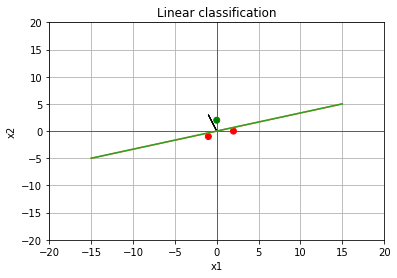

In [19]:
# Let's create some training data and labels:
#   X is a d x n matrix where d is the number of data dimensions and n the number of examples. So each data point
#     is a column vector.
#   y is a 1 x n matrix with the label (actual value) for each data point.
X = np.array([
    [2, 0, -1],
    [0, 2, -1],
    ])
y = np.array([-1, 1, -1])

# To test your algorithm on a larger dataset, uncomment the following code. It generates uniformly distributed
# random data in 2D, along with their labels.
#X = np.random.uniform(low=-10, high=10, size=(2, 20))  # d=2, n=20
#y = np.sign(np.dot(np.transpose([[3], [4]]), X) + 6)[0]  # theta=[3, 4], theta_0=6

# Plot positive data green, negative data red:
colors = np.choose(y > 0, np.transpose(np.array(['r', 'g']))).flatten()
plt.ion()  # enable matplotlib interactive mode
fig, ax = plt.subplots()  # create an empty plot and retrieve the 'ax' handle
ax.scatter(X[0, :], X[1, :], c=colors, marker='o')
# Set up a pretty 2D plot:
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.grid(True, which='both')
ax.axhline(color='black', linewidth=0.5)
ax.axvline(color='black', linewidth=0.5)
ax.set_title("Linear classification")


# We'll define a hook function that we'll use to plot the separator at each step of the learning algorithm:
def hook(params):
    (th, th0) = params
    plot_separator(ax, th, th0)


# Run the RLC or Perceptron: (uncomment the following lines to call the learning algorithms)
#theta, theta_0, error = random_linear_classifier(X, y, {"k": 10}, hook = None)
theta, theta_0 = perceptron(X, y, {"T": 10}, hook=None)
# Plot the returned separator:
plot_separator(ax, theta, theta_0)
print(theta, theta_0)
#print(theta, theta_0, E_n(None, X, y, Loss, theta, theta_0))

# Run the RLC, plot E_n over various k:
# Todo: Your code
def plot_RLC(ks, iterations):
    """
    Plots the error by a linear classificator over Ks different values of k and taking an average of a given number of iterations.
    Args:
        ks - the range of values of k
        iterations - the number of iterations per value of k
    """
    errors = []
    for n in range(1, ks):
        avg_error = 0
        for _ in range (iterations):
            theta, theta_0, error = random_linear_classifier(X, y, {"k": n}, hook = None)
            avg_error += error
        errors.append(avg_error/10)
    plt.plot(list(range(1, ks)), errors)

print("Finished.")